# Приоритизация гипотез и анализ A/B-теста для интернет-магазина

**Цель исследования** - выбрать наиболее приоритетную гипотезу для увеличения выручки интернет-магазина, провести анализ результатов A/B-теста.

**Ход исследования**

Исходные данные - девять гипотез по увеличению выручки интернет-магазина и результаты A/B-теста (данные о пользователях и о покупках).

Исследование пройдет в три этапа:
1. Приоритизация гипотез.
2. Предобработка данных.
3. Анализ A/B-теста.

## Приоритизация гипотез

Импортируем необходимые библиотеки и сохраняем исходные файлы в переменных.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

In [2]:
try:
    hyp = pd.read_csv(r'C:\Users\м\Documents\Data\hypothesis.csv')
except:
    hyp = pd.read_csv('/datasets/hypothesis.csv')

Выведем таблицу на экран. Укажем, чтобы текст в ячейке отображался полностью вне зависимости от длины.

In [3]:
pd.set_option('display.max_colwidth', None)
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице пять столбцов:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Проверим тип данных в таблице, чтобы при проведении расчетов не возникло проблем.

In [4]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Типы данных соответствуют необходимым. Теперь приведем названия столбцов к нижнему регистру.

In [5]:
hyp.columns = [x.lower() for x in hyp.columns]
hyp.head(3)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3


### Приоритизация гипотез с помощью фреймворка ICE

Применим фреймворк ICE для приоритизации гипотез:

In [6]:
hyp['ICE'] = hyp['impact'] * hyp['confidence'] / hyp['efforts']     #считаем ICE
hyp[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)   #выводим отсортированные данные

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективными гипотезами по ICE оказались: "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Приоритизация гипотез с помощью фреймворка RICE

Теперь рассчитаем RICE:

In [7]:
hyp['RICE'] = hyp['reach'] * hyp['impact'] * hyp['confidence'] / hyp['efforts']   #считаем RICE
hyp[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)               #выводим отсортированные данные

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По RICE с большим отрывом лидирует гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". За ней расположились следующие гипотезы: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". 

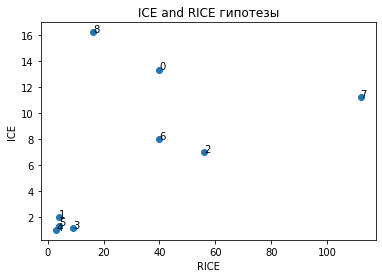

In [8]:
y = hyp['ICE'] 
z = hyp['RICE'] 
n = hyp.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE");

**Вывод:** Наиболее перспективной гипотезой по RICE оказалась "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", потому что у нее самый высокий параметр Reach (охват пользователей) - 10, у других гипотез он меньше. Гипотеза, оказавшаяся наиболее перспективной по ICE, по RICE заняла только пятое место, так как у нее минимальное количество баллов по параметру Reach - при реализации предложения "Запустить акцию, дающую скидку на товар в день рождения" будет охвачена крайне маленькая доля пользователей.   

## Предобработка данных

Мы провели A/B-тест и получили результаты в двух файлах. Прочитаем их: 

In [9]:
try:
    orders, visitors = (
    pd.read_csv(r'C:\Users\м\Documents\Data\orders.csv'),             #покупки
    pd.read_csv(r'C:\Users\м\Documents\Data\visitors.csv')            #пользователи
    )   
except:
    orders, visitors = (
    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv')
    ) 

Выведем первые строки таблиц на экран:

In [10]:
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Согласно документации к данным:

В таблице `orders` пять столбцов:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

В таблице `visitors` три столбца:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

Переименуем два столбца для удобства использования.

In [11]:
orders = orders.rename(columns={"transactionId": "orderId", "visitorId": "userId"})

Выведем теперь информацию о датафреймах:

In [12]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   orderId  1197 non-null   int64 
 1   userId   1197 non-null   int64 
 2   date     1197 non-null   object
 3   revenue  1197 non-null   int64 
 4   group    1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Пропусков нет, но в обеих таблицах даты записаны в неправильном формате (строковом). Приведем данные к нужному типу.

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверяем внесенные изменения:

In [14]:
display(orders[['date']].dtypes)
display(visitors[['date']].dtypes)

date    datetime64[ns]
dtype: object

date    datetime64[ns]
dtype: object

Теперь проверим таблицы на наличие дубликатов:

In [15]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


Явных строк-дубликатов в датафреймах нет. Однако проверим, нет ли пользователей, которые оказались сразу в двух группах теста.  

In [16]:
#создаем сводную таблицу, где каждому id пользователя будет соответствовать количество уникальных групп
double_users = (orders
                .pivot_table(index = 'userId', values = 'group', aggfunc = 'nunique')
                .sort_values(by='group',ascending=False)
                .reset_index()
               )

#считаем, сколько пользователей оказались в двух группах
double_users[double_users['group'] > 1]['group'].count()

58

58 пользователей присутствуют сразу и в группе A, и в группе B. Удалим их из таблицы `orders`, так как такое пересечение может сказаться на результатах теста:

In [17]:
#оставляем в сводной таблице пользователей, попавших в две группы
double_users = double_users.query('group > 1')

#удаляем те id, которые есть в таблице double_users 
orders = orders.query('~userId.isin(@double_users.userId)')

In [18]:
orders.shape[0]

1016

После удаления в таблице осталось 1016 записей о покупках. Посмотрим, сколько в итоге уникальных пользователей осталось в каждой группе.

In [19]:
orders.groupby('group').agg({'userId': 'nunique'})

,userId
group,
A,445
B,528


Выборки немного различаются по размеру - в группе A 445 пользователей, в группе B 528.

Взглянем на общее количество пользователей в день по группам.

In [20]:
visitors.sort_values(by='date').reset_index(drop=True).head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507
5,2019-08-03,B,509
6,2019-08-04,A,717
7,2019-08-04,B,770
8,2019-08-05,A,756
9,2019-08-05,B,707


На первый взгляд, разброс значений между группами не очень большой.

**Вывод:** На данном этапе мы подготовили данные к дальнейшему анализу. Мы переименовали некоторые столбцы, изменили тип данных, где необходимо, проверили данные на наличие полных дубликатов и удалили записи о пользователях, оказавшихся сразу в двух группах теста. Также мы выяснили, что в группе A 445 пользователей, а в группе B 528 пользователей.

## Анализ A/B-теста

### Анализ кумулятивных метрик

Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates()`:

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах - максимальную дату, группу, число уникальных ID заказов и пользователей, сумму выручки.

In [22]:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                           orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique',
                          'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )
ordersAggregated.head()

,date,group,orderId,userId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [23]:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                               visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим обе таблицы в одну.

In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Объявим переменные `cumulativeRevenueA` и `cumulativeRevenueB`, в которых сохраним данные о датах, выручке и числе заказов в группах A и B. Затем построим графики кумулятивной выручки по дням по группам.

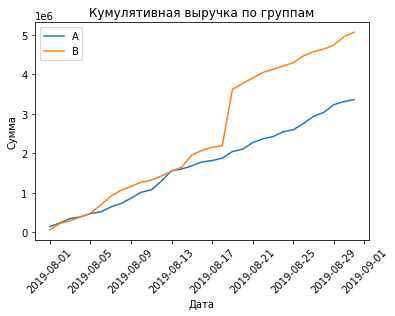

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма') ;

В начале теста показатели растут равномерно, выручка группы B немного превосходит выручку группы A. Однако 17 августа в группе B видим резкий скачок. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем далее.

Для каждой группы построим графики кумулятивного среднего чека по дням, разделив кумулятивную выручку на кумулятивное число заказов.

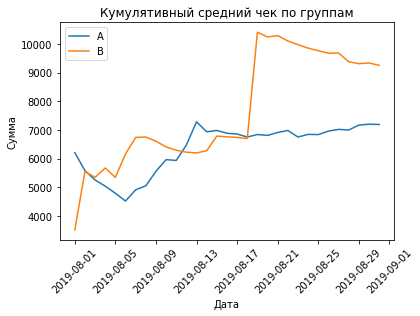

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=45)
plt.legend() 
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма') ;

Средний чек нестабилен. В начале графика видим рост значения для группы B и падение для группы A. Потом средний чек для этой группы начинает расти и достигает максимума около 13 августа. После этого значение более или менее выравнивается. В группе B же наблюдаем почти постоянный рост среднего чека с очень резким всплеском после 17 августа. Возможно, в группу B в этой части теста попали крупные заказы. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Теперь объединим таблицы `cumulativeRevenueA` и `cumulativeRevenueB` методом `merge()` и построим график относительного изменения кумулятивного среднего чека группы B к группе A, чтобы нагляднее увидеть разницу между группами.

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


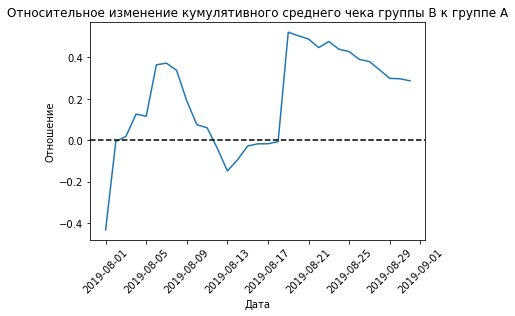

In [28]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение');

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

Теперь рассчитаем конверсию - отношение числа заказов к количеству пользователей в указанной группе в указанный день и построим графики кумулятивной конверсии по дням по группам.

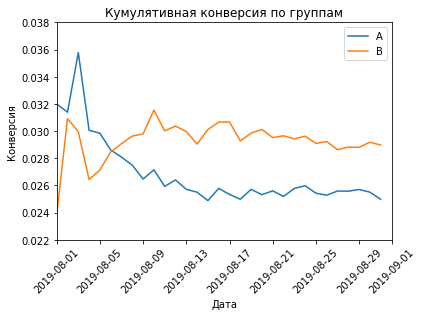

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам")
plt.xlabel('Дата')
plt.ylabel('Конверсия')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.022, 0.038]) ;

В начале графика наблюдаем стремительный рост конверсии в обеих группах и последующий за ним резкий спад. Но, если конверсия в группе A после этого продолжала падать до конца рассматриваемого периода, конверсия в группе B отросла обратно и в конце концов стабилизировалась.

Построим график относительного различия кумулятивной конверсии группы B к группе A.

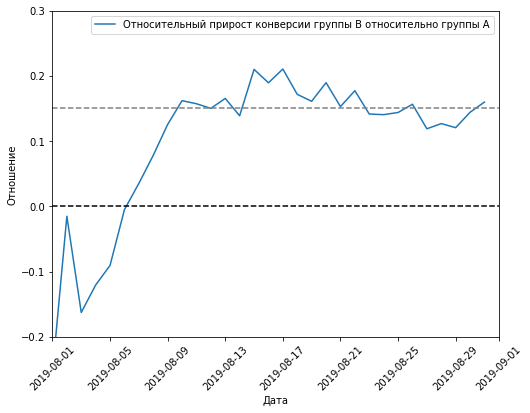

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
           .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8,6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Отношение')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3]) ;

До 5 августа группа B проигрывала по конверсии, а затем вырвалась вперед и в среднем колеблется около прироста в 15% относительно группы A.

**Вывод:** До середины августа выручка росла равномерно в обеих группах, а потом в группе B произошел резкий скачок. Средний чек нестабилен. Для группы A значение более или менее выравнивается во второй половине теста, а в группе B наблюдается почти постоянный рост среднего чека с очень резким всплеском после 17 августа. Что касается относительного изменения кумулятивного среднего чека группы B к группе A, результаты теста значительно и резко менялись в несколько дат. Все это свидетельствует о том, что в группу B попало некоторое количество очень крупных заказов. Кумулятивная конверсия в группе B выше, чем в группе A, - там она почти все время падает. Относительный прирост конверсии группы B относительно группы A в максимальной точке достигал 20%, к концу теста опустился до 15%.

Впрочем, пока делать выводы о результатах теста рано, необходимо изучить аномалии.

### Анализ выбросов и всплесков

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [31]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Больше трех заказов от одного пользователя в таблице нет.

Построим точечную диаграмму числа заказов на одного пользователя:

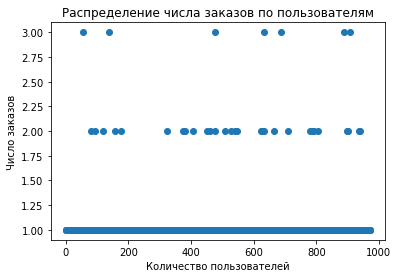

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Число заказов');

Больше всего пользователей, сделавших один заказ. Пользователей, заказавших более двух раз мало, но не факт, что это аномалии. 

Чтобы ответить на этот вопрос, обратимся к перцентилям. Посчитаем 95-й и 99-й выборочные перцентили количества заказов по пользователям. 

In [33]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершали покупки больше одного раза. И не более 1% пользователей - больше двух раз. Значит, три заказа все-таки будем считать выбросами.

Обратимся теперь к точечному графику стоимостей заказов.

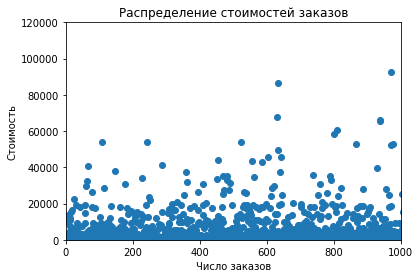

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимостей заказов')
plt.xlabel('Число заказов')
plt.ylabel('Стоимость')
plt.axis([0, 1000, 0, 120000]);

Большинство заказов - стоимостью до 20000 рублей, все что больше 40000 похоже на выбросы.

Рассчитаем перцентили.

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более чем у 5% заказов средний чек больше 26785 рублей. И не более 1% заказов совершены на сумму более 53900 рублей. За нижнюю границу стоимости заказа возьмем средний между 95 и 99 - 97-й перцентиль (это 35000 рублей) и будем отсеивать аномалии по нему.

In [36]:
np.percentile(orders['revenue'], 97)

34791.99999999998

**Вывод:** Как минимум, 95% пользователей совершали покупку только один раз. Судя по значению 99 перцентиля, наличие более двух заказов можно считать выбросами. Не более чем у 5% заказов средний чек больше 26785 рублей. После расчета перцентилей принимаем за аномалии заказы на сумму более 35000 рублей.   

### Расчет статистической значимости

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сначала создадим датафреймы с количеством пользователей по дням и по группам.

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

display(visitorsADaily.head())
display(visitorsBDaily.head())

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


Теперь создадим таблицы с кумулятивными данными о посетителях по дням и по группам.

In [38]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

display(visitorsACummulative.head())
display(visitorsBCummulative.head())

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Проделаем все то же для заказов:

In [39]:
#получаем агрегированные по дням данные о количестве заказов и сумме выручки группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#получаем кумулятивные данные группы A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#получаем агрегированные по дням данные о количестве заказов и сумме выручки группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#получаем кумулятивные данные группы B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

display(ordersACummulative.head())
display(ordersBCummulative.head())

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


Объединяем все созданный сейчас таблицы в один датафрейм:

In [40]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами.
Создадим переменные, в которых для пользователей, сделавших хотя бы 1 покупку, укажем число совершённых заказов.

In [41]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

display(ordersByUsersA.head())
display(ordersByUsersB.head())

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [42]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                        .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                        .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Прежде чем считать статистическую значимость различия конверсии между группами, сформулируем гипотезы. 

- H0 - различий в конверсии между группами нет. 
- H1 - различия в конверсии между группами есть.

Пороговое значение alpha примем за 5%.

In [43]:
#применяем метод Манна-Уитни

alpha = 0.05

results = stats.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.011
Отвергаем нулевую гипотезу: разница статистически значима


Выведем относительный прирост конверсии группы B:

In [44]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.160


P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ сырых данных показывает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы А равен 16%.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [45]:
alpha = 0.05

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Также найдём относительные различия в среднем чеке между группами.

In [46]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако относительное различие среднего чека между сегментами целых 28.7% (в пользу группы B).

Теперь раcсчитаем статистическую значимость по очищенным данным. Сначала сделаем срезы пользователей с числом заказов больше 2 и пользователей, совершивших заказы дороже 35000, и объединим их в одной таблице.

In [47]:
#пользователи, совершившие более 2 заказов 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

##пользователи, совершившие покупку на сумму больше, чем 35000
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['userId']

#объединяем датафреймы
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
Name: userId, dtype: int64

37


Аномальных пользователей оказалось 37. Теперь создадим переменные, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.

In [48]:
#очищенные данные о заказах для группы A
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#очищенные данные о заказах для группы B
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Гипотезы и уровень статистической значимости все те же:

- H0 - различий в конверсии между группами нет.
- H1 - различия в конверсии между группами есть.

Alpha = 5%.

In [49]:
alpha = 0.05

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.007
Отвергаем нулевую гипотезу: разница статистически значима


Относительный прирост конверсии группы B по очищенным данным:

In [50]:
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.194


Как и в случае с сырыми данными, статистическая значимость достигнута, отвергаем нулевую гипотезу. Сегмент B значительно лучше сегмента А. Относительный прирост конверсии группы B к А вырос с 16% до 19.4%

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [51]:
alpha = 0.05

results = stats.mannwhitneyu(orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.869
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Относительные различия в среднем чеке между группами по очищенным данным:

In [52]:
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.003


Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, по-прежнему нет. P-value стал еще больше. А вот относительное различие среднего чека между сегментами сократилось с 28.7% до 0,3%. Как раз на это отношение сильно влияли выбросы, от которых мы избавились.

**Выводы:**

- Есть статистически значимое различие по конверсии между группами как по «сырым» данным, так и по данным после фильтрации аномалий - группа B по показателям превосходит группу A;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Относительное различие среднего чека между сегментами было высоким до удаления аномалий, после их удаления различия не осталось;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A примерно на 15%;
- График различия среднего чека колеблется: благодаря ему мы смогли найти аномалии. Сделать из этого графика определённые выводы нельзя.

Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и зафиксировать победу группы B.

## Общий вывод

В первой части исследования была выполнена приоритизация гипотез с помощью фреймворков ICE и RICE. По ICE наиболее перспективной гипотезой оказалась: "Запустить акцию, дающую скидку на товар в день рождения". У нее большая сила влияния изменения на пользователей и  высокий параметр Confidence (уверенность в оценках других параметров). По RICE наиболее приоритетной стала другая гипотеза: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так произошло, потому что в расчете RICE присутствует параметр Reach (показывает, скольких пользователей затронет изменение, которое мы хотим внести) и у данной гипотезы самая высокая оценка за этот параметр.

Во второй части исследования был проведен анализ A/B-теста, состоящий из анализа кумулятивных метрик, исследования аномалий и выбросов и расчета статистической значимости. Из исследования кумулятивных метрик удалось понять, что выручка значительно выше в группе B - в середине августа произошел резкий скачок показателя. Средний чек нестабилен. В группе B наблюдается почти постоянный рост среднего чека с одним резким всплеском, что свидетельствует о появлении очень дорогих заказов в выборке. По графику различия среднего чека сделать определённые выводы нельзя - он сильно колеблется. Кумулятивная конверсия в группе B выше, чем в группе A, - там она почти все время падает. Относительный прирост конверсии группы B относительно группы A - в среднем около 15%. С помощью расчета перцентилей были обнаружены аномалии - пользователи с более чем двумя заказами и средние чеки на сумму более 35000 рублей. Была отвергнута гипотеза о равенстве конверсий между группами A и B как по «сырым» данным, так и по данным после фильтрации аномалий. Есть статистически значимое различие - конверсия в группе B значительно лучше. Средние чеки между группами ни до, ни после фильтрации выбросов не отличаются, а вот относительное различие в среднем чеке между сегментами после удаления аномалий сократилось почти до нуля. На основании всего вышесказанного следует остановить тест и зафиксировать победу группы B, так как, несмотря на отсутствие различий в средних чеках, конверсия в группе B лучше. Благодаря этому цель - увеличение выручки интернет-магазина - в перспективе будет достигнута.